## 2. Machine Learning for Regression


In [1]:
import pandas as pd
import numpy as np

## 2.2 Data preparation

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [3]:
!wget $data 

--2024-11-13 01:19:23--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv.6’

data.csv.6          100%[===================>]   1.41M  --.-KB/s    in 0.02s   

2024-11-13 01:19:23 (85.9 MB/s) - ‘data.csv.6’ saved [1475504/1475504]



In [4]:
df = pd.read_csv('data.csv')

In [5]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [6]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [7]:
df['make'].str.lower().str.replace(' ', '_')

0            bmw
1            bmw
2            bmw
3            bmw
4            bmw
          ...   
11909      acura
11910      acura
11911      acura
11912      acura
11913    lincoln
Name: make, Length: 11914, dtype: object

In [8]:
type(df.dtypes)

pandas.core.series.Series

In [9]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [10]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [11]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [12]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


## 2.3 Exploratory data analysis

In [13]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

In [14]:
df['make'].unique()

array(['bmw', 'audi', 'fiat', 'mercedes-benz', 'chrysler', 'nissan',
       'volvo', 'mazda', 'mitsubishi', 'ferrari', 'alfa_romeo', 'toyota',
       'mclaren', 'maybach', 'pontiac', 'porsche', 'saab', 'gmc',
       'hyundai', 'plymouth', 'honda', 'oldsmobile', 'suzuki', 'ford',
       'cadillac', 'kia', 'bentley', 'chevrolet', 'dodge', 'lamborghini',
       'lincoln', 'subaru', 'volkswagen', 'spyker', 'buick', 'acura',
       'rolls-royce', 'maserati', 'lexus', 'aston_martin', 'land_rover',
       'lotus', 'infiniti', 'scion', 'genesis', 'hummer', 'tesla',
       'bugatti'], dtype=object)

In [15]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


Distribution of price

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

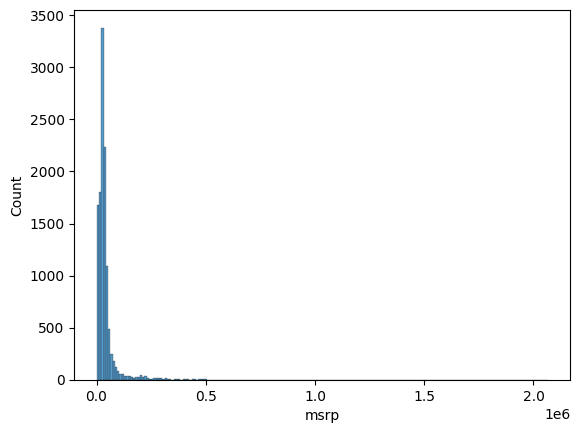

In [17]:
sns.histplot(df.msrp, bins=200)

<Axes: xlabel='msrp', ylabel='Count'>

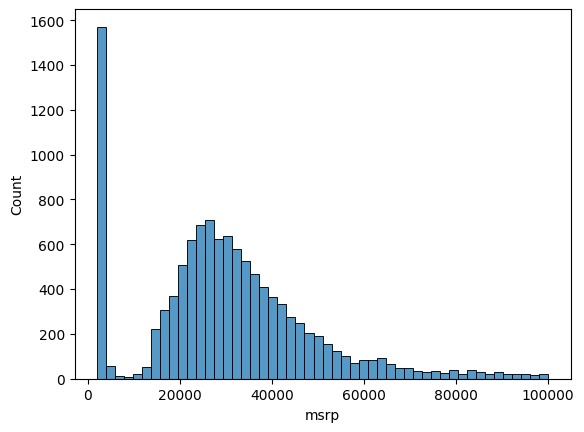

In [18]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

In [19]:
np.log1p([0, 1, 10, 1000, 100000])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [20]:
np.log([0 + 1, 1+ 1, 10 + 1, 1000 + 1, 100000])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51292546])

In [21]:
price_logs = np.log1p(df.msrp)

<Axes: xlabel='msrp', ylabel='Count'>

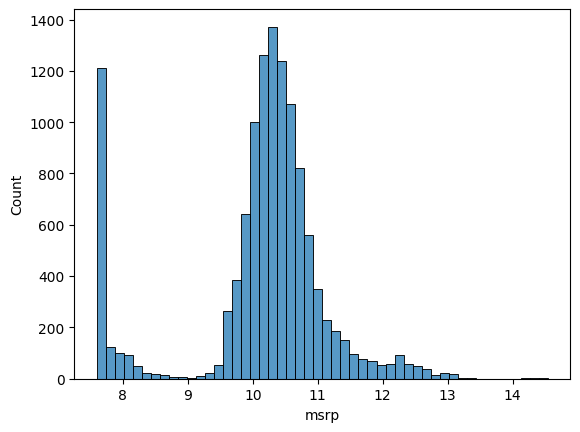

In [22]:
sns.histplot(price_logs, bins=50)

Missing values

In [23]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## 2.4 Setting up the validation framework

Let's draw it

In [24]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [25]:
n

11914

In [26]:
n_val, n_test, n_train

(2382, 2382, 7150)

In [27]:
df.iloc[[10, 0, 3, 5]]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
10,bmw,1_series,2013,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,39600
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
5,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,31200


In [28]:
n_train

7150

In [29]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [30]:
idx = np.arange(n)

In [31]:
np.random.seed(2)
np.random.shuffle(idx)

In [32]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [33]:
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336])

In [34]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [35]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [36]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [37]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


In [38]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [39]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [40]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978])

In [41]:
len(y_train)

7150

## 2.5 Linear regression

draw

In [42]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [43]:
xi = [453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [44]:
def linear_regression(xi):
    n = len(xi)

    pred = w0

    for j in range(n):
        pred = pred + w[j]*xi[j]

    return pred

In [45]:
xi = [453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [46]:
linear_regression(xi)

12.312

In [47]:
np.e**12.312-1

222347.22211010606

In [48]:
np.expm1(12.312)

np.float64(222347.2221101062)

In [49]:
np.log1p(222347.2221101062)

np.float64(12.312)

## 2.6 Linear regression vector form

In [50]:
def dot(xi, w):
    n = len(xi)
    
    res = 0.0
    
    for j in range(n):
        res = res + xi[j] * w[j]
    
    return res

In [51]:
def linear_regression(xi):
    return w0 + dot(xi, w)

In [52]:
w_new = [w0] + w

In [53]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [54]:
w0

7.17

In [55]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [56]:
linear_regression(xi)

12.312

In [57]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

In [58]:
x1  = [1, 148, 24, 1385]
x2  = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [59]:
def linear_regression(X):
    return X.dot(w_new)

In [60]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

## 2.7 Training a linear regression model

In [61]:
def train_linear_regression(X, y):
    pass

In [62]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [63]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [64]:
X = np.column_stack([ones, X])

In [65]:
X

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.580e+02, 2.400e+01, 1.850e+02],
       [1.000e+00, 1.720e+02, 2.500e+01, 2.010e+02],
       [1.000e+00, 4.130e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 3.800e+01, 5.400e+01, 1.850e+02],
       [1.000e+00, 1.420e+02, 2.500e+01, 4.310e+02],
       [1.000e+00, 4.530e+02, 3.100e+01, 8.600e+01]])

In [66]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [67]:
XTX = X.T.dot(X)
XTX_inv = np.linalg.inv(XTX)
w_full = XTX_inv.dot(X.T).dot(y)

In [68]:
w_full

array([ 2.58447541e+04, -1.60890647e+01, -1.99472549e+02, -1.22802883e+00])

In [69]:
w0 = w_full[0]
w = w_full[1:]

In [70]:
w0, w

(np.float64(25844.754055766753),
 array([ -16.08906468, -199.47254894,   -1.22802883]))

In [71]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [72]:
train_linear_regression(X, y)

LinAlgError: Singular matrix

## 2.8 Car price baseline model

In [77]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [78]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg',
        'city_mpg', 'popularity']

X_train = df_train[base].fillna(0).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

In [79]:
w0

np.float64(7.927257388069986)

In [80]:
w

array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
       -9.06908672e-06])

<Axes: ylabel='Count'>

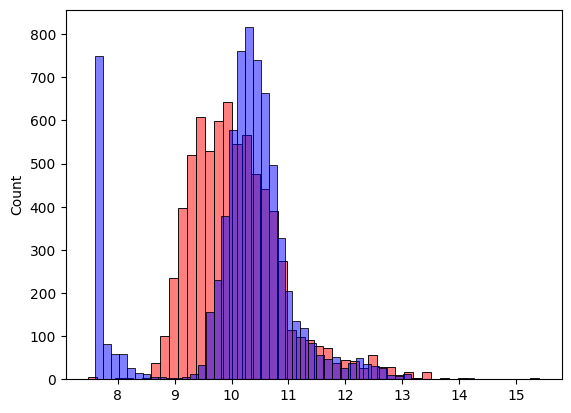

In [81]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)


## 2.9 RMSE

In [82]:
def rmse(y, y_pred):
    se = (y-y_pred)**2
    mse = np.mean(se)
    return np.sqrt(mse)

In [83]:
rmse(y_train, y_pred)

np.float64(0.7554192603920132)

## 2.10 Validating the model

In [84]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [85]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.761653099130156)

## 2.11 Simple feature engineering

In [86]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df['year']
    features = base + ['age']
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [87]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.5172055461058299)

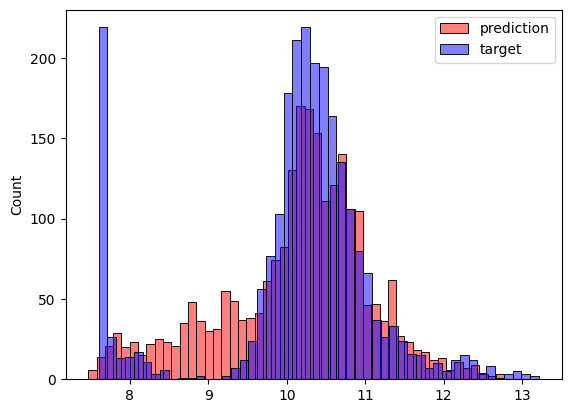

In [88]:
sns.histplot(y_pred, label='prediction', color='red', alpha=0.5, bins=50)
sns.histplot(y_val, label='target', color='blue',  alpha=0.5, bins=50)
plt.legend()

## 2.12 Categorical variables

In [89]:
categorical_columns = [
    'make', 'model', 'engine_fuel_type', 'driven_wheels', 'market_category',
    'vehicle_size', 'vehicle_style']

categorical = {}

for c in categorical_columns:
    categorical[c] = list(df_train[c].value_counts().head().index)

In [90]:
df.make.value_counts().head()

make
chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
Name: count, dtype: int64

In [91]:
categorical

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'model': ['silverado_1500', 'tundra', 'f-150', 'sierra_1500', 'tacoma'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'hatchback',
  'luxury,performance'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [92]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df['year']
    features = base + ['age']

    for v in [2, 3, 4]:
        df['num_doors_%d' % v] = (df.number_of_doors == v).astype(int)
        features.append('num_doors_%d' % v)

    for name, values in categorical.items():
        for value in values:
            df['%s_%s' % (name, value)] = (df[name] == value).astype(int)
            features.append('%s_%s' % (name, value))

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [93]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(53.70370772576197)

In [94]:
w0, w

(np.float64(120883643437600.25),
 array([ 1.97815705e-01,  3.59996839e+00,  1.77430262e-01,  2.54401440e+00,
        -3.91209144e-04,  1.31841741e+00, -1.87629844e+03, -1.87912990e+03,
        -1.87135179e+03, -3.16525752e+00,  8.11185787e-01,  8.76573747e+00,
        -7.26348843e+00, -5.87324602e+00, -3.43160292e+01, -2.49085861e+01,
        -4.50399871e+01, -2.85752551e+01,  9.63377197e+00,  3.79004788e+02,
         3.54982604e+02,  3.73756735e+02,  4.23480737e+02,  3.19067990e+02,
        -1.20883643e+14, -1.20883643e+14, -1.20883643e+14, -1.20883643e+14,
        -2.07609706e-01, -6.37629899e-01, -4.67620395e-01,  2.49283098e+01,
         4.01327473e+00, -2.32017237e+01, -2.26915593e+01, -5.85429953e+00,
        -1.44115660e-01, -2.62579827e-02,  1.75913981e-01,  3.65037816e-01,
        -2.90235596e-01]))

In [95]:
int(w0)

120883643437600

## 2.13 Regularization

In [96]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5.000001],
]

X = np.array(X)
X

array([[4.      , 4.      , 4.      ],
       [3.      , 5.      , 5.      ],
       [5.      , 1.      , 1.      ],
       [5.      , 4.      , 4.      ],
       [7.      , 5.      , 5.      ],
       [4.      , 5.      , 5.000001]])

In [97]:
y= [1, 2, 3, 1, 2, 3]

In [98]:
XTX = X.T.dot(X)
XTX

array([[140.      , 111.      , 111.000004],
       [111.      , 108.      , 108.000005],
       [111.000004, 108.000005, 108.00001 ]])

In [99]:
XTX_inv = np.linalg.inv(XTX)

In [100]:
XTX_inv

array([[ 4.13029882e-02, -6.18460955e+04,  6.18460502e+04],
       [-6.18460947e+04,  1.40737501e+12, -1.40737488e+12],
       [ 6.18460493e+04, -1.40737488e+12,  1.40737475e+12]])

In [101]:
XTX_inv.dot(X.T).dot(y)

array([ 4.14130492e-01, -1.76437236e+06,  1.76437228e+06])

In [102]:
XTX = [
    [1, 2, 2],
    [2, 1, 1.0000001],
    [2, 1.0000001, 1]
]

XTX = np.array(XTX)

In [103]:
np.linalg.inv(XTX)

array([[-3.33333356e-01,  3.33333339e-01,  3.33333339e-01],
       [ 3.33333339e-01, -5.00000008e+06,  4.99999991e+06],
       [ 3.33333339e-01,  4.99999991e+06, -5.00000008e+06]])

In [ ]:
np.linalg.inv(XTX)

In [105]:
c

In [106]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.4608208286551885)

## 2.14 Tuning the model

In [ ]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, score)

In [ ]:
r = 0.001
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
score

## 2.15 Using the model

In [107]:
df_full_train = pd.concat([df_train, df_val])

In [108]:
df_full_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870
2378,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238
2379,cadillac,escalade_hybrid,2013,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624
2380,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34,24,436


In [109]:
df_full_train = df_full_train.reset_index(drop=True)

In [110]:
X_full_train = prepare_X(df_full_train)

In [111]:
X_full_train

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   0.],
       [148.,   4.,  34., ...,   0.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   0.,   0.]])

In [112]:
y_full_train = np.concatenate([y_train, y_val])

In [113]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [114]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

np.float64(0.4600753970082232)

In [115]:
car = df_test.iloc[20].to_dict()
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [116]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031


In [117]:
X_small = prepare_X(df_small)

In [118]:
X_small

array([[2.660e+02, 6.000e+00, 2.500e+01, 1.800e+01, 2.031e+03, 2.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]])

In [119]:
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
y_pred

np.float64(10.63249251496894)

In [120]:
np.expm1(y_pred)

np.float64(41459.337028846196)

In [121]:
np.expm1(y_test[20])

np.float64(35000.00000000001)

## 2.16 Next steps

* We included only 5 top features. What happens if we include 10?

Other projects

* Predict the price of a house - e.g. boston dataset
* https://archive.ics.uci.edu/ml/datasets.php?task=reg
* https://archive.ics.uci.edu/ml/datasets/Student+Performance

## 2.17 Summary

* EDA - looking at data, finding missing values
* Target variable distribution - long tail => bell shaped curve
* Validation framework: train/val/test split (helped us detect problems)
* Normal equation - not magic, but math
* Implemented it with numpy
* RMSE to validate our model
* Feature engineering: age, categorical features
* Regularization to fight numerical instability